# solve linear equation

$ 0 = v_0 - gT $

$ v_0 = $ initial velocity
$ g = $ acceleration due to gravity
$ T = $ time of zero velocity

$ T = \frac {v_0} {g} $

In [6]:
from sympy import symbols, Eq, solve, latex
from IPython.display import display, Markdown

# Define symbols
v_0, g, T = symbols('v_0 g T')

# Set up the equation
equation = Eq(0, v_0 - g*T)

# Solve for T
solution = solve(equation, T)
latex_output = 'T = ' + latex(solution[0])
print(solution[0])
print(latex(solution[0]))

display(Markdown('$' + latex_output + '$'))

v_0/g
\frac{v_{0}}{g}


$T = \frac{v_{0}}{g}$

$- \omega^{2} y{\left(x \right)} + \frac{d^{2}}{d x^{2}} y{\left(x \right)}=0$

$y{\left(x \right)} = C_{1} e^{- \omega x} + C_{2} e^{\omega x}$

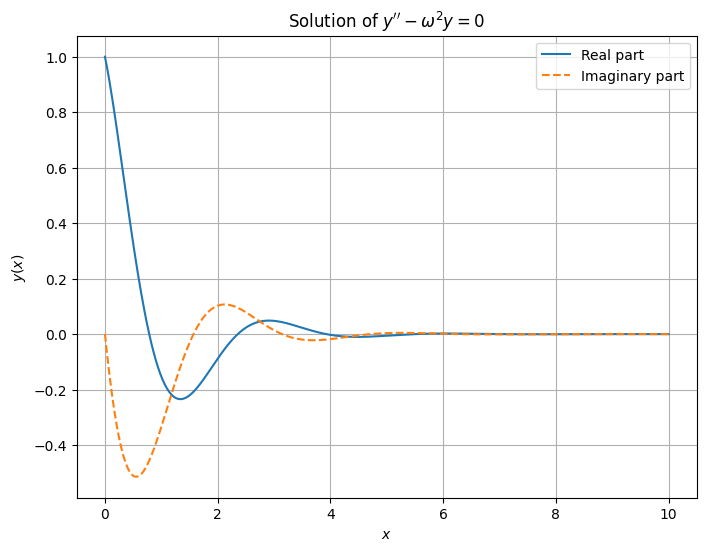

In [8]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Define variables and functions
x = sp.symbols('x')
y = sp.Function('y')(x)
omega = sp.symbols('omega', positive=True)

# Define and solve the differential equation
differential_equation = sp.Derivative(y, x, 2) - omega**2 * y
display(Markdown('$' + sp.latex(differential_equation) + '=0$'))

general_solution = sp.dsolve(differential_equation, y)
display(Markdown('$' + sp.latex(general_solution) + '$'))

# Extract the right-hand side of the solution
solution = general_solution.rhs

# Substitute specific values for omega and constants of integration
omega_value = 1+2.j  # Replace with the desired value for omega
C1, C2 = sp.symbols('C1 C2')  # Constants of integration
solution_specific = solution.subs({omega: omega_value, C1: 1, C2: 0})  # Example: C1=1, C2=0

# Convert the SymPy expression to a lambda function
y_func = sp.lambdify(x, solution_specific, modules='numpy')

# Create x values and compute y values
x_vals = np.linspace(0, 10, 500)  # Adjust range and resolution as needed
y_vals = y_func(x_vals)

# Plot the solution
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals.real, label="Real part")
if np.iscomplexobj(y_vals):  # Check for complex values
    plt.plot(x_vals, y_vals.imag, label="Imaginary part", linestyle="--")

plt.title("Solution of $y'' - \\omega^2 y = 0$")
plt.xlabel("$x$")
plt.ylabel("$y(x)$")
plt.legend()
plt.grid()
plt.show()


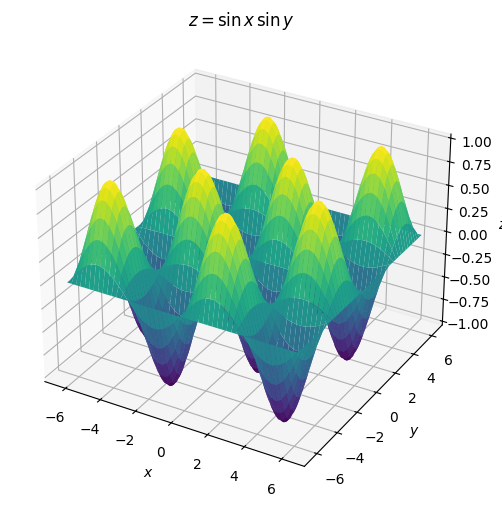

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import is needed for 3D plotting

# Generate data
x = np.linspace(-2*np.pi, 2*np.pi, 1000)  # x-coordinates
y = np.linspace(-2*np.pi, 2*np.pi, 1000)  # y-coordinates
x, y = np.meshgrid(x, y)     # Create a grid for x and y
z = np.sin(x)*np.sin(y)              # Calculate z values based on the function

# Create a figure for 3D plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create the surface plot
surface = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

# Add color bar for scale
#fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)

# Set plot titles and labels
ax.set_title(r"$z = \sin x \, \sin y $")
ax.set_xlabel( r"$x$")
ax.set_ylabel( r"$y$")
ax.set_zlabel( r"$z$")

# Show the plot
plt.show()


In [16]:
from vpython import *

# Create a 3D scene
scene = canvas(title="VPython in Jupyter Notebook",
               width=600, height=400,
               center=vector(0,0,0), background=color.white)

# Add objects to the scene
ball = sphere(pos=vector(0,0,0), radius=0.5, color=color.red)
floor = box(pos=vector(0,-0.5,0), size=vector(4,0.1,4), color=color.blue)

# Animation loop
while True:
    rate(50)  # Controls the frame rate (50 updates per second)
    ball.pos.x += 0.05  # Move the ball
    if ball.pos.x > 2:  # Reset when it goes too far
        ball.pos.x = -2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 